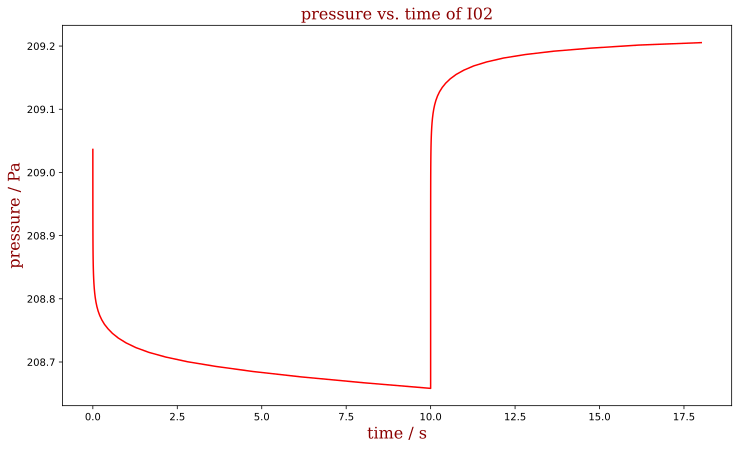

In [1]:
# import the packages we need in this exercise
import numpy as np
import pandas as pd
from math import pi, e
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg' # To create high resolution images

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

# load pressure and time data from the .txt file and plot pressure vs time

pressure = np.genfromtxt(r"C:\Users\User\Desktop\Wells\P02_pressure.txt")
time = np.genfromtxt(r"C:\Users\User\Desktop\Wells\P02_time.txt")
rate = np.genfromtxt(r"C:\Users\User\Desktop\Wells\P02_rate.txt")
plt.figure(figsize=(12, 7))
plt.plot(time, pressure,'r')
plt.title('pressure vs. time of I02', fontdict=font)
plt.xlabel('time / s', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

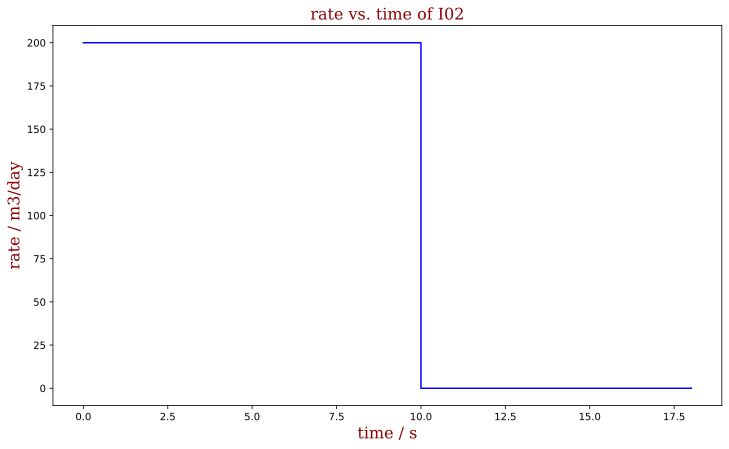

In [5]:
plt.figure(figsize=(12, 7))
plt.plot(time, rate,'b')
plt.title('rate vs. time of I02', fontdict=font)
plt.xlabel('time / s', fontdict=font)
plt.ylabel('rate / m3/day', fontdict=font)
plt.show()

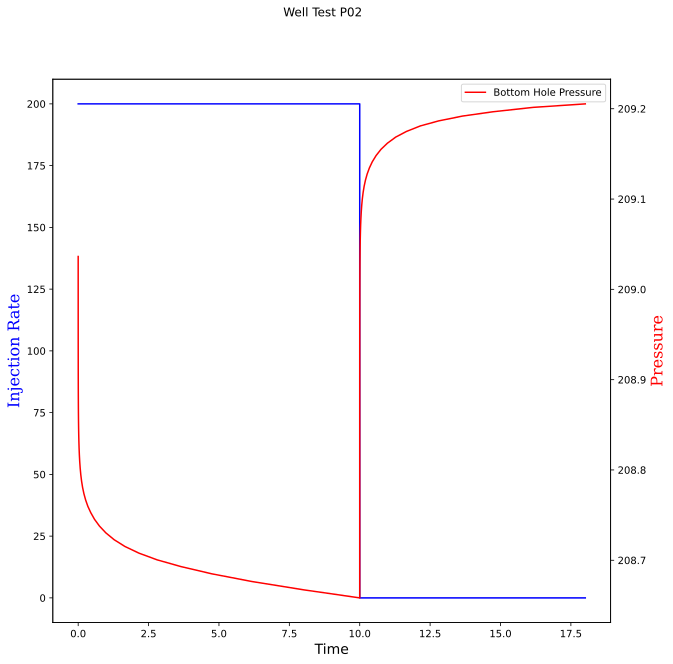

In [3]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10,10))
fig.suptitle('Well Test P02')


ax2=ax.twinx()

# make a plot for two different y-axis on same x-axis
ax.plot(time, rate, color = "blue", linewidth = 1.5, label = 'Water Rate')
ax2.plot(time, pressure, color = "red", linewidth = 1.5, label = 'Bottom Hole Pressure')

# set x-axis label
ax.set_xlabel('Time',fontsize=14)
# set y-axis label
ax.set_ylabel('Injection Rate',color="blue", fontdict=font)
ax2.set_ylabel("Pressure",color="red",fontdict=font)
plt.legend(['Bottom Hole Pressure', 'Water Rate'],fontsize = 10)

#plt.grid(False)

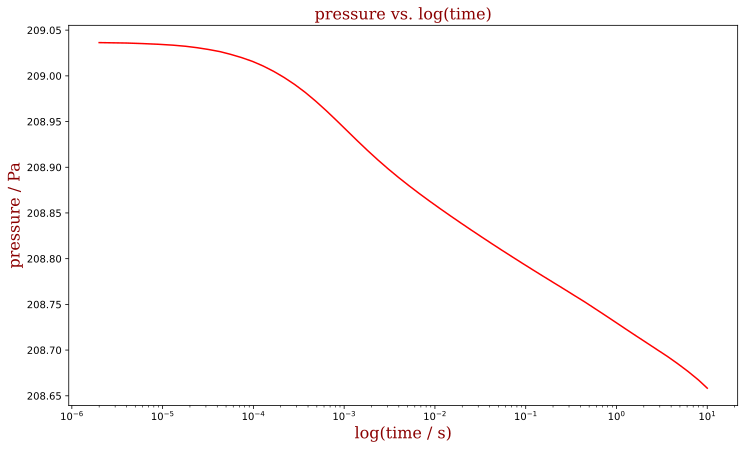

In [4]:
# step 1: find when the pressure starts to build up

for i in range(len(pressure)):
    if pressure[i+1] > pressure[i]:
        break
pressure_drop = pressure[:i+1]
ind = i

plt.figure(figsize=(12, 7))
plt.semilogx(time[:ind+1], pressure_drop,'r')
plt.title('pressure vs. log(time)', fontdict=font)
plt.xlabel('log(time / s)', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

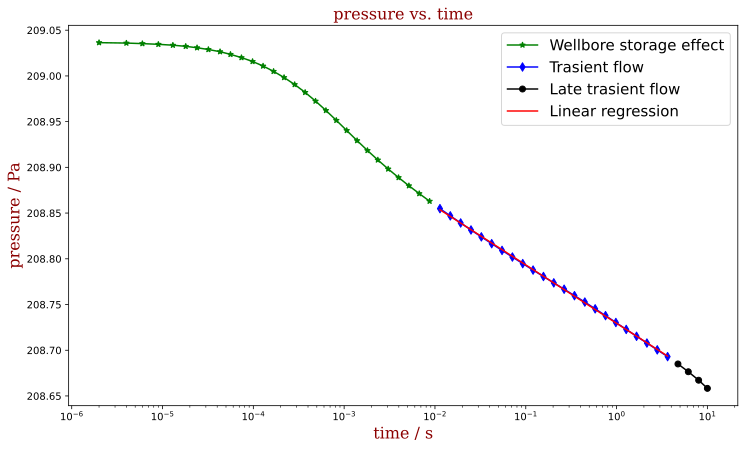

In [10]:
# Step 2: from the pressure drawdown curve to distinguish the flow regimes
# from the curve, we can find, from 500 s, it's already a straight line, which means it's transient flow. 
# Before that, it's the effect of wellbore storage. And after 50000s, pressure starts to decrease quickly. 
# This is the late transient flow now from the time table, we can find the index of these two time points 
# then linear regression for transient flow using least square

for i in range(len(time)):
    if time[i] > 0.01:
        break
ind_start = i

for i in range(len(time)):
    if time[i] > 4:
        break
ind_end = i

pressure_wellbore = pressure_drop[:ind_start]
pressure_transient = pressure_drop[ind_start:ind_end]
pressure_late = pressure_drop[ind_end:]


# transient flow 
P = pressure_transient
T = time[ind_start:ind_end]

num_coef = 2
num_points = len(P)

# Now regress data to line

A = np.ones((num_points, num_coef))
for ii in range(num_points):
    A[ii,0] = 1
    A[ii,1] = np.log(T[ii])
rhs = np.zeros((num_points))
rhs[:] = P

solution = np.linalg.solve(np.dot(A.T, A), np.dot(A.T, rhs))

pressure_fit = np.zeros((num_points))
for ii in range(num_points):
    pressure_fit[ii] = solution[0] + solution[1] * np.log(T[ii])

# visualize the results
plt.figure(figsize=(12, 7))
plt.semilogx(time[:ind_start], pressure_wellbore,'g*-',time[ind_start:ind_end], pressure_transient,'bd-',
            time[ind_end:ind+1], pressure_late,'ko-')
plt.semilogx(T,pressure_fit,'r')
plt.legend(['Wellbore storage effect','Trasient flow','Late trasient flow','Linear regression'],fontsize = 15)
plt.title('pressure vs. time', fontdict=font)
plt.xlabel('time / s', fontdict=font)
plt.ylabel('pressure / Pa', fontdict=font)
plt.show()

## Import well log

In [38]:
filename = r"C:\Users\User\Desktop\Wells\P02_welllogs.txt"

In [39]:
df_I02_log = pd.read_csv(filename, delim_whitespace=True)
df_I02_log.head(10)

,@@@,Acoustic,log,"report,",powered,by,DARTS,(https://darts.citg.tudelft.nl/),@@@.1
0,@@@,Special,edition,for,SPE,GeoEnergy,Hackathon,2021.0,@@@
1,Well,name:,I02,NaN,NaN,NaN,NaN,NaN,NaN
2,depth(m),transit,time,(micron/sec),NaN,NaN,NaN,NaN,NaN
3,2017.7900,232.763285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.8581,233.375255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017.9262,225.447232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017.9943,237.962389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018.0625,235.482800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018.1306,240.090190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018.1987,244.399285,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_I02_log = df_I02_log.drop(df_I02_log.index[:3])
df_I02_log.head(10)

,@@@,Acoustic,log,"report,",powered,by,DARTS,(https://darts.citg.tudelft.nl/),@@@.1
3,2017.7900,232.763285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017.8581,233.375255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017.9262,225.447232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017.9943,237.962389,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018.0625,235.482800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018.1306,240.090190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018.1987,244.399285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2018.2668,240.141967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2018.3349,239.507224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2018.4030,238.302115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_I02_log = df_I02_log.drop(df_I02_log.columns[[2,3,4,5,6,7,8]], axis=1)  # df.columns is zero-based pd.Index
df_I02_log.head()

,@@@,Acoustic
3,2017.7900,232.763285
4,2017.8581,233.375255
5,2017.9262,225.447232
6,2017.9943,237.962389
7,2018.0625,235.482800


In [42]:
df_I02_log=pd.DataFrame(df_I02_log)

In [43]:
# store dataframe into csv file

df_I02_log.to_csv('Welllog_I02.csv', index=False)

In [47]:
filename = r"C:\Users\User\Welllog_I02.csv"

colnames=['Depth', 'Acoustic'] 

df_I02_log = pd.read_csv(filename, names=colnames, header=None)
df_I02_log.head(20)

,Depth,Acoustic
0,@@@,Acoustic
1,2017.7900,232.763285
2,2017.8581,233.375255
3,2017.9262,225.447232
4,2017.9943,237.962389
5,2018.0625,235.482800
6,2018.1306,240.090190
7,2018.1987,244.399285
8,2018.2668,240.141967
9,2018.3349,239.507224


In [48]:
df_I02_log = df_I02_log.drop(0)
df_I02_log.head(10)

,Depth,Acoustic
1,2017.7900,232.763285
2,2017.8581,233.375255
3,2017.9262,225.447232
4,2017.9943,237.962389
5,2018.0625,235.482800
6,2018.1306,240.090190
7,2018.1987,244.399285
8,2018.2668,240.141967
9,2018.3349,239.507224
10,2018.4030,238.302115


## You can use the imported text files and concatenate them in a dataframe but just importing the saved csv file is faster

In [49]:
import seaborn as sns
sns.set()
%matplotlib inline

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

%config InlineBackend.figure_format='svg' # To create high resolution images

In [50]:
filename_input = r"C:\Users\User\Desktop\Wells\I02_test.csv"

In [51]:
df_I02_test = pd.read_csv(filename_input)
df_I02_test.head(10)

,time(day),water_rate(m3/d),BHP(bars)
0,0.000001,199.916,207.971277
1,0.000002,200.000,207.969802
2,0.000004,200.000,207.968888
3,0.000006,200.000,207.967731
4,0.000009,200.000,207.966270
5,0.000013,200.000,207.964435
6,0.000018,200.000,207.962138
7,0.000024,200.000,207.959278
8,0.000032,200.000,207.955734
9,0.000043,200.000,207.951368


In [11]:
# uncomment to convert the 'time' column to datetime format
#df_I02_test['time(day)']= pd.to_datetime(df_I02_test['time(day)'])
 
# Check the format of 'time' column
#df_I02_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   time(day)          113 non-null    datetime64[ns]
 1    water_rate(m3/d)  113 non-null    float64       
 2    BHP(bars)         113 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 2.8 KB


In [53]:
import xgboost
print("xgboost", xgboost.__version__)

xgboost 1.5.0


In [54]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot
 
# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = concat(cols, axis=1)
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]
 
# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
    # transform list into array
    train = asarray(train)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    # make a one-step prediction
    yhat = model.predict(asarray([testX]))
    return yhat[0]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # split test row into input and output columns
        testX, testy = test[i, :-1], test[i, -1]
        # fit model on history and make a prediction
        yhat = xgboost_forecast(history, testX)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
        # summarize progress
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    # estimate prediction error
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions
 


>expected=208.2, predicted=208.2
>expected=208.2, predicted=208.2
>expected=208.2, predicted=208.2
>expected=208.3, predicted=208.2
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
>expected=208.3, predicted=208.3
MAE: 0.005


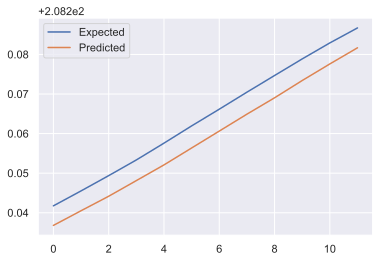

In [55]:
# load the dataset
series = df_I02_test
values = series.values
# transform the time series data into supervised learning
data = series_to_supervised(values, n_in=6)
# evaluate
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

In [56]:
X = df_I02_test.drop(df_I02_test.columns[[2]], axis=1)
y = df_I02_test.drop(df_I02_test.columns[[0,1]], axis=1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [58]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt

In [77]:
# XGBoost Regressor
model = XGBRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

pred_train = model.predict(X_train)

In [78]:
from sklearn import metrics

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)

Accuracy of train data: 0.9999278713704458
Accuracy of test data: 0.9984349665530813
Mean Absolute Error: 0.007540016572842573
Mean Squared Error: 7.761665307089367e-05
Root Mean Squared Error: 0.008810031388757572


<AxesSubplot:ylabel='Density'>

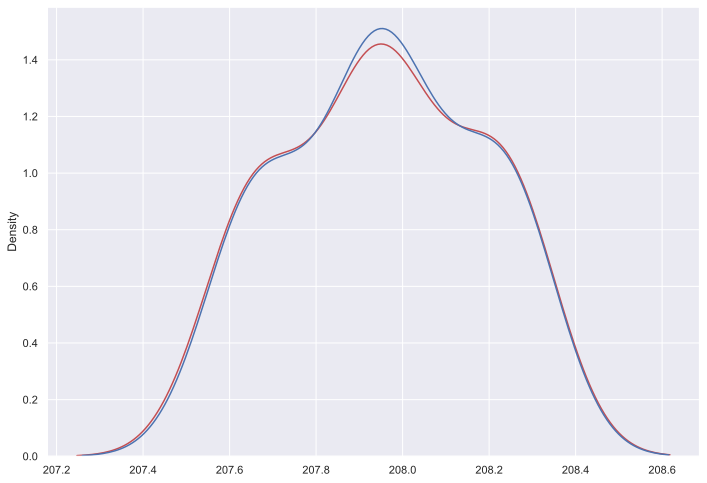

In [79]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual")

sns.distplot(pred, hist=False, color="b", label="Prediced Values", ax=ax1)

<AxesSubplot:ylabel='Density'>

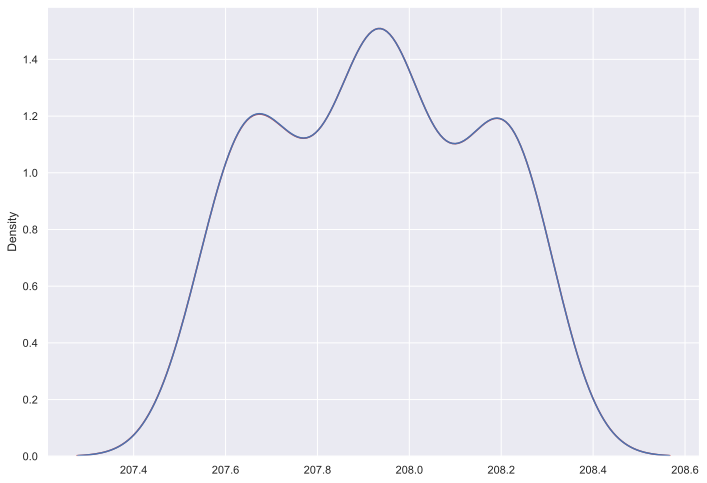

In [83]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(y_train, hist=False, color="r", label="Actual_train data")

sns.distplot(pred_train, hist=False, color="b", label="Prediced Values", ax=ax1)

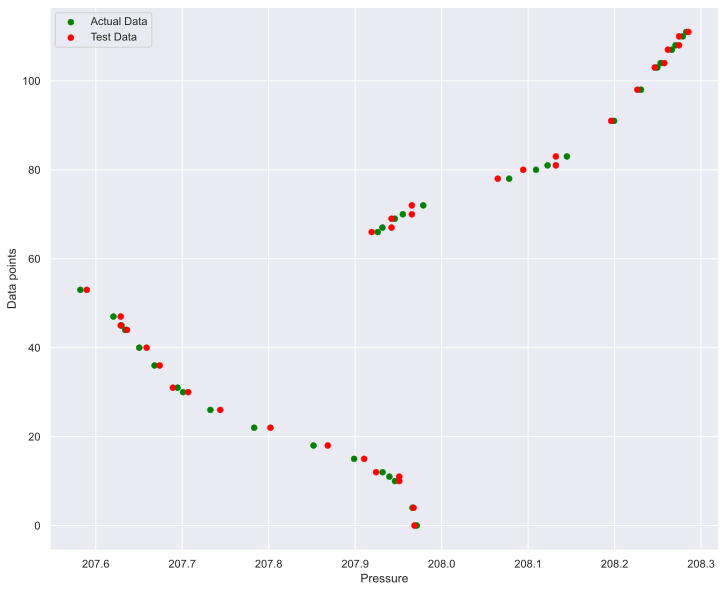

In [84]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(y_test, y_test.index, color = "green", linewidth = 0.5, label = 'Actual Data')
ax.scatter(pred, y_test.index, color = "red", linewidth = 0.5, label = 'Test Data')
ax.set_xlabel('Pressure')
ax.set_ylabel('Data points')
plt.show
plt.legend()

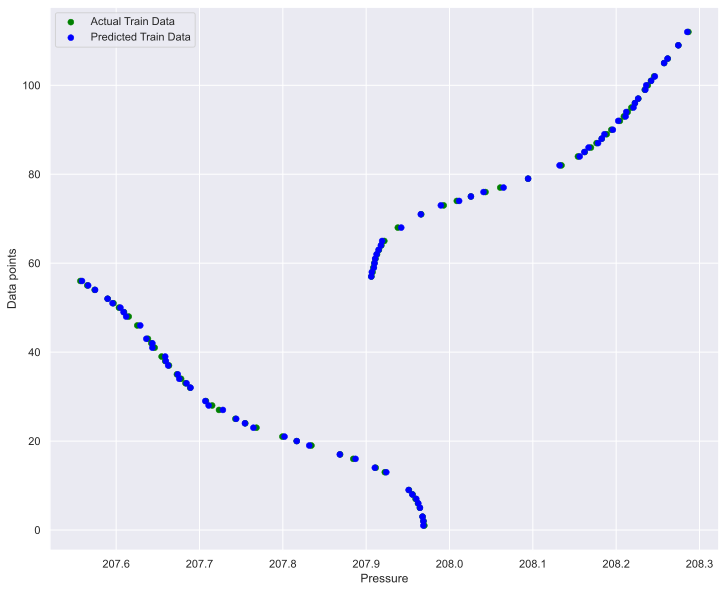

In [85]:
fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(y_train, y_train.index, color = "green", linewidth = 0.5, label = 'Actual Train Data')
ax.scatter(pred_train, y_train.index, color = "blue", linewidth = 0.5, label = 'Predicted Train Data')
ax.set_xlabel('Pressure')
ax.set_ylabel('Data points')
plt.show
plt.legend()